## Work
1. 請建立自己的deep neural network
2. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
3. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

print("x train shape: ", x_train.shape, "y train shape: ", y_train.shape)


# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print("x train shape: ", x_train.shape, "y train shape: ", y_train.shape)

x train shape:  (50000, 32, 32, 3) y train shape:  (50000, 1)
x train shape:  (50000, 3072) y train shape:  (50000, 10)


In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])   
    
    return model
model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
"""
Compile 模型
"""
model.summary()

#optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='sgd')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 30s 598us/step - loss: 2.0637 - acc: 0.2683 - val_loss: 1.9488 - val_acc: 0.3085
Epoch 2/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.8884 - acc: 0.3347 - val_loss: 1.8675 - val_acc: 0.3343
Epoch 3/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.8186 - acc: 0.3604 - val_loss: 1.8292 - val_acc: 0.3468
Epoch 4/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.7699 - acc: 0.3786 - val_loss: 1.8037 - val_acc: 0.3662
Epoch 5/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.7373 - acc: 0.3896 - val_loss: 1.7684 - val_acc: 0.3734
Epoch 6/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.7045 - acc: 0.4001 - val_loss: 1.7391 - val_acc: 0.3789
Epoch 7/500
50000/50000 [==============================] - 7s 137us

50000/50000 [==============================] - 7s 133us/step - loss: 1.1873 - acc: 0.5838 - val_loss: 1.4671 - val_acc: 0.4895
Epoch 58/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.1830 - acc: 0.5846 - val_loss: 1.4468 - val_acc: 0.4966
Epoch 59/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.1758 - acc: 0.5881 - val_loss: 1.3819 - val_acc: 0.5084
Epoch 60/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.1740 - acc: 0.5880 - val_loss: 1.4602 - val_acc: 0.4796
Epoch 61/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.1700 - acc: 0.5892 - val_loss: 1.3830 - val_acc: 0.5000
Epoch 62/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.1587 - acc: 0.5971 - val_loss: 1.3983 - val_acc: 0.5025
Epoch 63/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.1517 - acc: 0.5961 - val_loss: 1.5790 - val_acc: 0.4692
Epoch 64/500
50000/50000 [=======

50000/50000 [==============================] - 7s 140us/step - loss: 0.8768 - acc: 0.6984 - val_loss: 1.3699 - val_acc: 0.5341
Epoch 116/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.8770 - acc: 0.6950 - val_loss: 1.6151 - val_acc: 0.4764
Epoch 117/500
50000/50000 [==============================] - 7s 135us/step - loss: 0.8738 - acc: 0.6963 - val_loss: 1.4358 - val_acc: 0.5212
Epoch 118/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.8540 - acc: 0.7069 - val_loss: 1.4565 - val_acc: 0.5082
Epoch 119/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.8621 - acc: 0.6992 - val_loss: 1.5476 - val_acc: 0.4882
Epoch 120/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.8486 - acc: 0.7060 - val_loss: 1.5225 - val_acc: 0.4997
Epoch 121/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.8500 - acc: 0.7029 - val_loss: 1.6490 - val_acc: 0.4725
Epoch 122/500
50000/50000 [

50000/50000 [==============================] - 7s 134us/step - loss: 0.5910 - acc: 0.7997 - val_loss: 1.5263 - val_acc: 0.5386
Epoch 174/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.5756 - acc: 0.8027 - val_loss: 1.5877 - val_acc: 0.5305
Epoch 175/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.5776 - acc: 0.8041 - val_loss: 1.6562 - val_acc: 0.5110
Epoch 176/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.5683 - acc: 0.8068 - val_loss: 1.8158 - val_acc: 0.4852
Epoch 177/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.5730 - acc: 0.8056 - val_loss: 1.5969 - val_acc: 0.5219
Epoch 178/500
50000/50000 [==============================] - 7s 132us/step - loss: 0.5530 - acc: 0.8118 - val_loss: 1.5520 - val_acc: 0.5349
Epoch 179/500
50000/50000 [==============================] - 7s 132us/step - loss: 0.5586 - acc: 0.8103 - val_loss: 1.7090 - val_acc: 0.5162
Epoch 180/500
50000/50000 [

50000/50000 [==============================] - 7s 137us/step - loss: 0.3566 - acc: 0.8879 - val_loss: 2.1177 - val_acc: 0.5101
Epoch 232/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.3013 - acc: 0.9073 - val_loss: 1.9161 - val_acc: 0.5133
Epoch 233/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.3222 - acc: 0.8982 - val_loss: 1.9867 - val_acc: 0.5137
Epoch 234/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.3429 - acc: 0.8925 - val_loss: 1.8818 - val_acc: 0.5337
Epoch 235/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.3050 - acc: 0.9044 - val_loss: 1.8980 - val_acc: 0.5368
Epoch 236/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.3224 - acc: 0.8999 - val_loss: 2.0324 - val_acc: 0.5099
Epoch 237/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.3078 - acc: 0.9059 - val_loss: 1.9227 - val_acc: 0.5284
Epoch 238/500
50000/50000 [

50000/50000 [==============================] - 7s 137us/step - loss: 0.1975 - acc: 0.9481 - val_loss: 2.1872 - val_acc: 0.5439
Epoch 290/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.2030 - acc: 0.9519 - val_loss: 2.2750 - val_acc: 0.5328
Epoch 291/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.1132 - acc: 0.9755 - val_loss: 2.2408 - val_acc: 0.5334
Epoch 292/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.1054 - acc: 0.9772 - val_loss: 2.2871 - val_acc: 0.5317
Epoch 293/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.1768 - acc: 0.9560 - val_loss: 2.2738 - val_acc: 0.5295
Epoch 294/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.1883 - acc: 0.9515 - val_loss: 2.2357 - val_acc: 0.5377
Epoch 295/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.0965 - acc: 0.9804 - val_loss: 2.2957 - val_acc: 0.5350
Epoch 296/500
50000/50000 [

50000/50000 [==============================] - 7s 136us/step - loss: 0.0431 - acc: 0.9947 - val_loss: 2.5369 - val_acc: 0.5410
Epoch 348/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.0401 - acc: 0.9958 - val_loss: 2.5411 - val_acc: 0.5434
Epoch 349/500
50000/50000 [==============================] - 7s 140us/step - loss: 0.0367 - acc: 0.9966 - val_loss: 2.5329 - val_acc: 0.5472
Epoch 350/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.0383 - acc: 0.9957 - val_loss: 2.5553 - val_acc: 0.5415
Epoch 351/500
50000/50000 [==============================] - 7s 139us/step - loss: 0.0342 - acc: 0.9972 - val_loss: 2.5498 - val_acc: 0.5475
Epoch 352/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.0341 - acc: 0.9970 - val_loss: 2.5594 - val_acc: 0.5457
Epoch 353/500
50000/50000 [==============================] - 7s 138us/step - loss: 0.1713 - acc: 0.9672 - val_loss: 2.4132 - val_acc: 0.4985
Epoch 354/500
50000/50000 [

50000/50000 [==============================] - 7s 138us/step - loss: 0.0139 - acc: 0.9995 - val_loss: 2.8256 - val_acc: 0.5476
Epoch 406/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.0136 - acc: 0.9996 - val_loss: 2.8527 - val_acc: 0.5439
Epoch 407/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.0131 - acc: 0.9997 - val_loss: 2.8424 - val_acc: 0.5463
Epoch 408/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.0129 - acc: 0.9998 - val_loss: 2.8376 - val_acc: 0.5454
Epoch 409/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.0129 - acc: 0.9997 - val_loss: 2.8520 - val_acc: 0.5465
Epoch 410/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.0129 - acc: 0.9996 - val_loss: 2.8689 - val_acc: 0.5407
Epoch 411/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.0132 - acc: 0.9996 - val_loss: 2.8501 - val_acc: 0.5466
Epoch 412/500
50000/50000 [

50000/50000 [==============================] - 7s 137us/step - loss: 0.0071 - acc: 1.0000 - val_loss: 3.0230 - val_acc: 0.5436
Epoch 464/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.0070 - acc: 1.0000 - val_loss: 3.0387 - val_acc: 0.5459
Epoch 465/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.0070 - acc: 1.0000 - val_loss: 3.0331 - val_acc: 0.5454
Epoch 466/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.0069 - acc: 0.9999 - val_loss: 3.0412 - val_acc: 0.5431
Epoch 467/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.0069 - acc: 1.0000 - val_loss: 3.0419 - val_acc: 0.5455
Epoch 468/500
50000/50000 [==============================] - 7s 138us/step - loss: 0.0070 - acc: 0.9999 - val_loss: 3.0397 - val_acc: 0.5452
Epoch 469/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.0068 - acc: 0.9999 - val_loss: 3.0436 - val_acc: 0.5461
Epoch 470/500
50000/50000 [

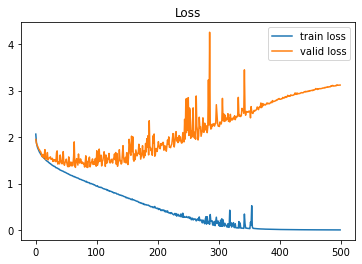

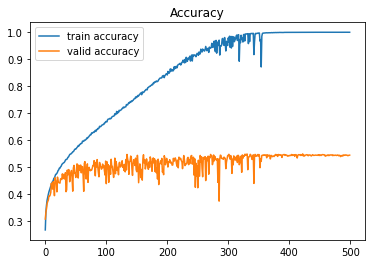

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()